In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import imblearn
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [81]:

train_data = pd.read_csv('data/train.csv')

Renaming Columns

In [82]:
# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]



In [83]:
train_data = train_data.rename(columns={
    'Genes_in_mothers_side': 'Genes_Mothers_Side',
    'Inherited_from_father': 'Inherited_Father',
    'Blood_cell_count_(mcL)': 'Blood_Cell_mcL',
    'Respiratory_Rate_(breaths/min)': 'Respiratory_Rate_breaths_min',
    'Heart_Rate_(rates/min': 'Heart_Rates_Min',
    'Follow-up': 'Follow_up',
    'Autopsy_shows_birth_defect_(if_applicable)': 'Autopsy_Birth_Defect',
    'Folic_acid_details_(peri-conceptional)': 'Folic_Acid',
    'H/O_serious_maternal_illness': 'Maternal_Illness',
    'H/O_radiation_exposure_(x-ray)': 'Radiation_Exposure',
    'H/O_substance_abuse': 'Substance_Abuse',
    'Assisted_conception_IVF/ART': 'Assisted_Conception',
    'History_of_anomalies_in_previous_pregnancies': 'History_Previous_Pregnancies',
    'No._of_previous_abortion': 'Previous_Abortion',
    'Birth_defects': 'Birth_Defects',
    'White_Blood_cell_count_(thousand_per_microliter)': 'White_Blood_Cell',
})

In [84]:
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Fathers_name', 'Mothers_age',
       'Fathers_age', 'Institute_Name', 'Location_of_Institute', 'Status',
       'Respiratory_Rate_breaths_min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Place_of_birth',
       'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

If Genetic_Disorder is NaN, removing those rows

In [85]:
# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)

# Reset the index to update row numbers and avoid keeping the old index
train_data.reset_index(drop=True, inplace=True)

# Perform Chi-Square Test for Each Feature
    - to evaluate feature improtance

In [86]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming train_data is already loaded
# Define X (all categorical features except the target) and y (target variable)
X = train_data.drop(columns=['Genetic_Disorder', 'Disorder_Subclass'])  # Features
y = train_data['Genetic_Disorder']  # Target variable


In [87]:
# Initialize an empty list to store results
chi2_results = []

# Loop through each feature in X
for column in X.columns:
    # Create a contingency table for the feature and the target
    contingency_table = pd.crosstab(X[column], y)
    
    # Perform the Chi-Square test
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
    
    # Append results (feature name, Chi-Square statistic, p-value)
    chi2_results.append({'Feature': column, 'Chi2 Stat': chi2_stat, 'p-value': p})

# Convert results to a DataFrame for better visualization
chi2_df = pd.DataFrame(chi2_results)

# Sort features by Chi-Square statistic (descending order)
chi2_df = chi2_df.sort_values(by='Chi2 Stat', ascending=False)

print(chi2_df)


                         Feature     Chi2 Stat        p-value
0                     Patient_Id  39874.000000   4.962328e-01
6                 Blood_Cell_mcL  39874.000000   4.962328e-01
36              White_Blood_Cell  30969.304917   9.410793e-01
9                   Fathers_name  30507.493656   2.989873e-01
8                    Family_Name  12018.213711   3.519372e-01
7             Patient_First_Name   4988.118109   9.422057e-02
42                     Symptom_5   1001.441227  3.465776e-218
41                     Symptom_4    653.909808  1.012253e-142
40                     Symptom_3    587.264659  2.999850e-128
39                     Symptom_2    386.997596   9.215941e-85
38                     Symptom_1    210.217763   2.247982e-46
2             Genes_Mothers_Side    174.722576   1.146766e-38
3               Inherited_Father    172.798123   3.001680e-38
4                  Maternal_gene    114.615651   1.292789e-25
5                  Paternal_gene    112.651041   3.452529e-25
11      

Dropping the unnecessary data columns - Based on Optimised Paper

In [88]:
train_data = train_data.drop(columns=['Patient_Id','Patient_First_Name', 'Family_Name',
       'Fathers_name','Institute_Name', 'Place_of_birth',
       'Location_of_Institute','Test_1', 'Test_2', 'Test_3', 'Test_4','Test_5','Parental_consent'])
#, 
  #   

In [89]:
train_data.duplicated().sum()

0

In [90]:
train_data.columns

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [91]:
print(train_data["Genes_Mothers_Side"].value_counts())

Genes_Mothers_Side
Yes    11848
No      8089
Name: count, dtype: int64


In [92]:
print(train_data['Genetic_Disorder'].value_counts())

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


In [93]:
def get_unique(train_data):
    for i in train_data.columns:
        print(f'{i} - > {len(train_data[i].unique())}')
get_unique(train_data)

Patient_Age - > 16
Genes_Mothers_Side - > 2
Inherited_Father - > 3
Maternal_gene - > 3
Paternal_gene - > 2
Blood_Cell_mcL - > 19937
Mothers_age - > 35
Fathers_age - > 46
Status - > 2
Respiratory_Rate_breaths_min - > 3
Heart_Rates_Min - > 3
Follow_up - > 3
Gender - > 4
Birth_asphyxia - > 5
Autopsy_Birth_Defect - > 4
Folic_Acid - > 3
Maternal_Illness - > 3
Radiation_Exposure - > 5
Substance_Abuse - > 5
Assisted_Conception - > 3
History_Previous_Pregnancies - > 3
Previous_Abortion - > 6
Birth_Defects - > 3
White_Blood_Cell - > 15682
Blood_test_result - > 5
Symptom_1 - > 3
Symptom_2 - > 3
Symptom_3 - > 3
Symptom_4 - > 3
Symptom_5 - > 3
Genetic_Disorder - > 3
Disorder_Subclass - > 10


In [94]:
# Continuous features with median imputation
train_data['Patient_Age'].fillna(train_data['Patient_Age'].median(), inplace=True)
train_data['Blood_Cell_mcL'].fillna(train_data['Blood_Cell_mcL'].median(), inplace=True)
train_data['White_Blood_Cell'].fillna(train_data['White_Blood_Cell'].median(), inplace=True)

# Categorical/ordinal features with mode imputation
columns_to_fill_mode = [
    'Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene','Mothers_age',
    'Fathers_age','Status', 'Respiratory_Rate_breaths_min', 'Heart_Rates_Min',
    'Follow_up', 'Gender', 'Birth_asphyxia','Autopsy_Birth_Defect',  
    'Folic_Acid', 
    'Maternal_Illness', 'Radiation_Exposure', 
    'Substance_Abuse', 'Assisted_Conception', 
    'History_Previous_Pregnancies','Previous_Abortion', 'Birth_Defects', 
    'Blood_test_result','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Disorder_Subclass'
]

for col in columns_to_fill_mode:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)



In [95]:
train_data.isnull().sum()

Patient_Age                     0
Genes_Mothers_Side              0
Inherited_Father                0
Maternal_gene                   0
Paternal_gene                   0
Blood_Cell_mcL                  0
Mothers_age                     0
Fathers_age                     0
Status                          0
Respiratory_Rate_breaths_min    0
Heart_Rates_Min                 0
Follow_up                       0
Gender                          0
Birth_asphyxia                  0
Autopsy_Birth_Defect            0
Folic_Acid                      0
Maternal_Illness                0
Radiation_Exposure              0
Substance_Abuse                 0
Assisted_Conception             0
History_Previous_Pregnancies    0
Previous_Abortion               0
Birth_Defects                   0
White_Blood_Cell                0
Blood_test_result               0
Symptom_1                       0
Symptom_2                       0
Symptom_3                       0
Symptom_4                       0
Symptom_5     

In [96]:
print("Status: ",train_data["Status"].unique())
print("Respiratory Rate (breaths/min): ",train_data["Respiratory_Rate_breaths_min"].unique())
print("Heart Rate: ",train_data["Heart_Rates_Min"].unique())
print("Follow-up: ",train_data["Follow_up"].unique())
print("Gender: ",train_data["Gender"].unique())
print("Autopsy shows birth defect: ",train_data["Autopsy_Birth_Defect"].unique())
print("Birth defects: ",train_data["Birth_Defects"].unique())
print("Blood test result: ",train_data["Blood_test_result"].unique())
print("Genetic Disorder: ",train_data["Genetic_Disorder"].unique())
print("Disorder Subclass: ",train_data["Disorder_Subclass"].unique())
print("Symptom_1: ",train_data["Symptom_1"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect:  ['Not applicable' 'No' 'Yes']
Birth defects:  ['Multiple' 'Singular']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Diabetes' 'Leigh syndrome'
 'Cancer' 'Cystic fibrosis' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]
Symptom_1:  [1. 0.]


In [97]:
""" # Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

# Create a Cramér's V correlation matrix
def cramers_v_matrix(data):
    cols = data.columns
    correlation_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            correlation_matrix.iloc[i, j] = cramers_v(data[cols[i]], data[cols[j]])

    return correlation_matrix.astype(float)

# Assuming train_data is your DataFrame with all categorical values
cramers_v_corr = cramers_v_matrix(train_data)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Correlation Heatmap")
plt.show() """

' # Function to calculate Cramér\'s V\ndef cramers_v(x, y):\n    confusion_matrix = pd.crosstab(x, y)\n    chi2 = chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))\n\n# Create a Cramér\'s V correlation matrix\ndef cramers_v_matrix(data):\n    cols = data.columns\n    correlation_matrix = pd.DataFrame(index=cols, columns=cols)\n\n    for i in range(len(cols)):\n        for j in range(len(cols)):\n            correlation_matrix.iloc[i, j] = cramers_v(data[cols[i]], data[cols[j]])\n\n    return correlation_matrix.astype(float)\n\n# Assuming train_data is your DataFrame with all categorical values\ncramers_v_corr = cramers_v_matrix(train_data)\n\n# Create a heatmap\nplt.figure(figsize=(12, 8))\nsns.heatmap(cramers_v_corr, annot=True, fmt=".2f", cmap=\'coolwarm\', square=True, cbar_kws={"shrink": .8})\nplt.title("Cramér\'s V Correlation Heatmap")\nplt.show() '

Encoding

In [98]:
encode_train_data = train_data.copy()

In [99]:
encode_train_data.columns

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [109]:
# Columns to encode
columns_to_encode = [
    "Genes_Mothers_Side", "Inherited_Father", "Maternal_gene", "Paternal_gene", "Status",
    "Respiratory_Rate_breaths_min", "Heart_Rates_Min", "Follow_up",
    "Gender", "Birth_asphyxia", "Autopsy_Birth_Defect", "Folic_Acid", "Maternal_Illness",
    "Radiation_Exposure", "Substance_Abuse", "Assisted_Conception", 
    "History_Previous_Pregnancies", "Birth_Defects", "Blood_test_result", "Symptom_1", "Symptom_2",
       "Symptom_3", "Symptom_4", "Symptom_5",
    "Genetic_Disorder", "Disorder_Subclass"
]

# Dictionary to store mappings for each column
encoding_mappings = {}

# Loop through each column and encode using pd.factorize()
for col in columns_to_encode:
    # Encode the column and get the unique values
    encode_train_data[col], unique_values = pd.factorize(encode_train_data[col])
    
    # Store the mapping of encoded values to original values
    encoding_mappings[col] = {index: value for index, value in enumerate(unique_values)}

# Print each column's encoding mappings one below the other
for col, mapping in encoding_mappings.items():
    print(f"Encoding mapping for '{col}':")
    for encoded_value, original_value in mapping.items():
        print(f"  {encoded_value}: {original_value}")
    print("\n")  # Blank line between columns for readability


Encoding mapping for 'Genes_Mothers_Side':
  0: 0
  1: 1


Encoding mapping for 'Inherited_Father':
  0: 0
  1: 1


Encoding mapping for 'Maternal_gene':
  0: 0
  1: 1


Encoding mapping for 'Paternal_gene':
  0: 0
  1: 1


Encoding mapping for 'Status':
  0: 0
  1: 1


Encoding mapping for 'Respiratory_Rate_breaths_min':
  0: 0
  1: 1


Encoding mapping for 'Heart_Rates_Min':
  0: 0
  1: 1


Encoding mapping for 'Follow_up':
  0: High
  1: Low


Encoding mapping for 'Gender':
  0: Ambiguous
  1: Male
  2: Female


Encoding mapping for 'Birth_asphyxia':
  0: Yes
  1: No record
  2: Not available
  3: No


Encoding mapping for 'Autopsy_Birth_Defect':
  0: Not applicable
  1: No
  2: Yes


Encoding mapping for 'Folic_Acid':
  0: No
  1: Yes


Encoding mapping for 'Maternal_Illness':
  0: No
  1: Yes


Encoding mapping for 'Radiation_Exposure':
  0: No
  1: Yes
  2: -
  3: Not applicable


Encoding mapping for 'Substance_Abuse':
  0: No
  1: Not applicable
  2: -
  3: Yes


Encoding mappi

In [110]:
encode_train_data

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Mothers_age,Fathers_age,Status,Respiratory_Rate_breaths_min,...,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,0,0,0,0,4.760603,23.0,20.0,0,0,...,0,9.857562,0,0,0,0,0,0,0,0
1,6.0,0,0,1,0,4.893297,41.0,22.0,0,0,...,1,7.472366,1,1,0,0,0,0,1,1
2,12.0,0,0,0,0,4.705280,21.0,20.0,1,1,...,1,7.919321,2,1,1,0,1,1,0,2
3,11.0,0,0,0,1,4.720703,32.0,20.0,0,1,...,0,4.098210,0,1,1,1,1,1,1,3
4,14.0,0,0,0,0,5.103188,23.0,20.0,1,0,...,0,10.272230,1,0,1,1,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,1,1,0,1,5.012599,47.0,20.0,1,0,...,0,12.000000,0,0,0,1,1,1,0,2
19933,4.0,0,1,0,0,5.258298,35.0,64.0,1,0,...,0,6.584811,2,1,1,0,1,1,0,2
19934,8.0,1,1,1,1,4.974220,23.0,56.0,0,0,...,0,7.041556,2,0,0,0,0,1,1,1
19935,8.0,0,0,0,0,5.186470,35.0,51.0,1,1,...,1,7.715464,1,1,1,1,0,1,0,7


In [111]:
#encode_train_data = encode_train_data.astype("float32")
encode_train_data

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Mothers_age,Fathers_age,Status,Respiratory_Rate_breaths_min,...,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,0,0,0,0,4.760603,23.0,20.0,0,0,...,0,9.857562,0,0,0,0,0,0,0,0
1,6.0,0,0,1,0,4.893297,41.0,22.0,0,0,...,1,7.472366,1,1,0,0,0,0,1,1
2,12.0,0,0,0,0,4.705280,21.0,20.0,1,1,...,1,7.919321,2,1,1,0,1,1,0,2
3,11.0,0,0,0,1,4.720703,32.0,20.0,0,1,...,0,4.098210,0,1,1,1,1,1,1,3
4,14.0,0,0,0,0,5.103188,23.0,20.0,1,0,...,0,10.272230,1,0,1,1,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,1,1,0,1,5.012599,47.0,20.0,1,0,...,0,12.000000,0,0,0,1,1,1,0,2
19933,4.0,0,1,0,0,5.258298,35.0,64.0,1,0,...,0,6.584811,2,1,1,0,1,1,0,2
19934,8.0,1,1,1,1,4.974220,23.0,56.0,0,0,...,0,7.041556,2,0,0,0,0,1,1,1
19935,8.0,0,0,0,0,5.186470,35.0,51.0,1,1,...,1,7.715464,1,1,1,1,0,1,0,7


Model implementation before balancing

In [112]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
# Assuming 'Genetic Disorder' is the target column with the specified classes
X = encode_train_data.drop(['Genetic_Disorder','Disorder_Subclass'], axis=1)  # Drop the target column from features
y = encode_train_data['Genetic_Disorder']  # Set target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Mothers_age,Fathers_age,Status,Respiratory_Rate_breaths_min,...,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
2009,13.0,0,0,0,0,4.855640,22.0,50.0,0,0,...,0,4.0,0,12.000000,1,1,0,0,1,0
7703,12.0,0,1,1,1,5.307853,31.0,57.0,0,0,...,0,0.0,1,4.164498,2,1,0,0,1,1
5923,9.0,0,0,0,1,4.722383,23.0,24.0,1,1,...,1,0.0,0,5.447406,1,1,0,1,1,1
19278,7.0,1,0,0,0,4.899593,43.0,36.0,0,1,...,0,0.0,0,7.608308,3,1,1,1,0,1
3950,0.0,0,0,0,1,4.914728,35.0,20.0,1,0,...,1,3.0,1,3.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,13.0,0,0,1,0,4.880873,38.0,57.0,0,0,...,0,0.0,0,6.384752,0,1,0,0,1,0
11964,5.0,1,0,0,0,4.892897,23.0,37.0,0,0,...,1,3.0,1,7.869853,2,0,1,0,1,0
5390,8.0,1,0,1,1,4.853507,27.0,60.0,1,0,...,0,0.0,0,7.466184,1,1,0,0,1,1
860,9.0,0,0,1,0,4.765405,23.0,28.0,0,0,...,0,2.0,0,8.909825,3,1,0,1,0,1


In [114]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names in y_train
#y_train = y_train.map(disorder_mapping)


In [42]:

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('svc', SVC(probability=True, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=disorder_mapping.values()))

Accuracy: 0.5905215646940822
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.63      0.82      0.71      2048
Multifactorial genetic inheritance disorders       0.39      0.25      0.31       409
            Single-gene inheritance diseases       0.55      0.37      0.45      1531

                                    accuracy                           0.59      3988
                                   macro avg       0.52      0.48      0.49      3988
                                weighted avg       0.57      0.59      0.57      3988



Applying SMOTE for balancing

In [115]:
# Assuming 'Genetic Disorder' is the target column with the specified classes
X = encode_train_data.drop(['Genetic_Disorder','Disorder_Subclass'], axis=1)  # Drop the target column from features
y = encode_train_data['Genetic_Disorder']  # Set target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for multiclass targets
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_res.value_counts())


Class distribution before SMOTE:
 Genetic_Disorder
0    8154
2    6133
1    1662
Name: count, dtype: int64
Class distribution after SMOTE:
 Genetic_Disorder
0    8154
2    8154
1    8154
Name: count, dtype: int64


 0: Mitochondrial genetic inheritance disorders
  1: Multifactorial genetic inheritance disorders
  2: Single-gene inheritance diseases

In [46]:

# Convert the SMOTE-resampled target data back into a DataFrame for plotting
y_train_res_df = pd.DataFrame(y_train_res, columns=['Genetic_Disorder'])

In [47]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names
#y_train_res_df['Genetic_Disorder'] = y_train_res_df['Genetic_Disorder'].replace(disorder_mapping)


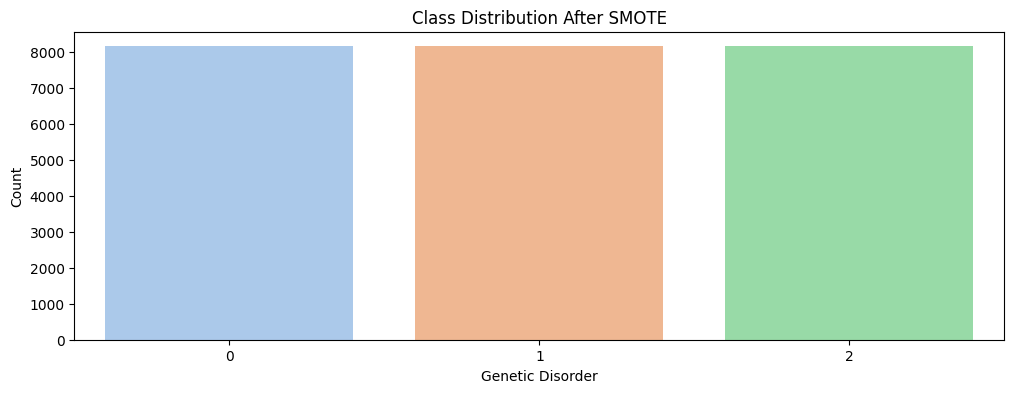

In [48]:
# Plot the balanced class distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='Genetic_Disorder', data=y_train_res_df, palette='pastel')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.show()


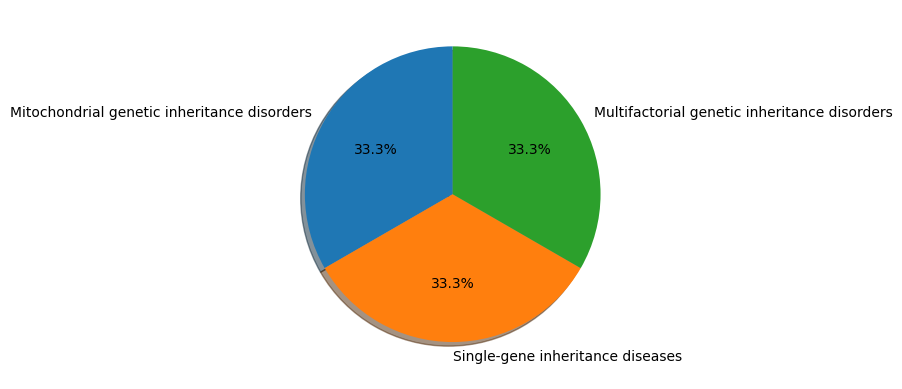

In [ ]:
labels_disorder = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode_disorder = (0, 0, 0)


plt.pie(y_train_res_df.Genetic_Disorder.value_counts(), explode=explode_disorder, labels=labels_disorder, autopct='%1.1f%%',
        shadow=True, startangle=90);

In [49]:
X_train_res.columns
#remove disorder subclass

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

Implementing the Optimized stacked model - paper 

In [54]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

# Load and preprocess data (example setup; adjust column names as needed)
#data = pd.read_csv('encoded_data.csv')
#X = data.drop(columns=['Genetic_Disorder', 'Disorder_Subclass'])  # Adjust as per dataset
#y = data['Genetic_Disorder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define base classifiers
base_classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('etc', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_res, y_train_res)

# Make predictions and evaluate
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)

# Calculate accuracy, classification report, and AUC scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC for each class if multi-class
if len(y.unique()) > 2:
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print("ROC AUC Score:", auc_score)


Accuracy: 0.5809929789368105
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69      2041
           1       0.39      0.14      0.21       414
           2       0.49      0.50      0.50      1533

    accuracy                           0.58      3988
   macro avg       0.51      0.46      0.46      3988
weighted avg       0.56      0.58      0.57      3988

ROC AUC Score: 0.6760673025106692


Implementing the Chain classifier paper 

In [ ]:

# Load and preprocess data (example setup; adjust column names as needed)
data = pd.read_csv('encoded_data.csv')
X = data.drop(columns=['Genetic_Disorder', 'Disorder_Subclass'])  # Adjust as per dataset
y = data['Genetic_Disorder']

# Preprocessing: Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a chain classifier (multi-output classifier)
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [55]:
# Evaluate individual classifiers and compare with stacking model

# Dictionary to store results
results = {}

# Loop through each base classifier
for name, model in base_classifiers:
    # Train the individual model
    model.fit(X_train_res, y_train_res)
    
    # Predict on the test set
    y_pred_individual = model.predict(X_test)
    y_pred_proba_individual = model.predict_proba(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_individual)
    class_report = classification_report(y_test, y_pred_individual, zero_division=0)
    if len(y.unique()) > 2:
        auc_score = roc_auc_score(y_test, y_pred_proba_individual, multi_class='ovr')
    else:
        auc_score = roc_auc_score(y_test, y_pred_proba_individual[:, 1])
    
    # Store results
    results[name] = {
        'Accuracy': acc,
        'Classification Report': class_report,
        'ROC AUC Score': auc_score
    }

    # Print results for the individual model
    print(f"Results for {name}:")
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(class_report)
    print(f"ROC AUC Score: {auc_score}")
    print("-" * 50)

# Compare with Stacking Model
print("Evaluating Stacking Model:")
y_pred_stacking = stacking_model.predict(X_test)
y_pred_proba_stacking = stacking_model.predict_proba(X_test)
stacking_acc = accuracy_score(y_test, y_pred_stacking)
stacking_class_report = classification_report(y_test, y_pred_stacking, zero_division=0)
if len(y.unique()) > 2:
    stacking_auc_score = roc_auc_score(y_test, y_pred_proba_stacking, multi_class='ovr')
else:
    stacking_auc_score = roc_auc_score(y_test, y_pred_proba_stacking[:, 1])

print("Stacking Model Results:")
print(f"Accuracy: {stacking_acc}")
print("Classification Report:")
print(stacking_class_report)
print(f"ROC AUC Score: {stacking_auc_score}")
print("-" * 50)

# Add Stacking Model results to the dictionary
results['stacking_model'] = {
    'Accuracy': stacking_acc,
    'Classification Report': stacking_class_report,
    'ROC AUC Score': stacking_auc_score
}

# Optional: Save results to a file for further analysis
import json
with open('classifier_results.json', 'w') as f:
    json.dump(results, f, indent=4)


Results for svc:
Accuracy: 0.4799398194583751
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.60      2041
           1       0.40      0.50      0.44       414
           2       0.37      0.24      0.29      1533

    accuracy                           0.48      3988
   macro avg       0.44      0.46      0.44      3988
weighted avg       0.46      0.48      0.46      3988

ROC AUC Score: 0.6499632460646559
--------------------------------------------------
Results for rf:
Accuracy: 0.5699598796389167
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2041
           1       0.43      0.36      0.39       414
           2       0.51      0.40      0.45      1533

    accuracy                           0.57      3988
   macro avg       0.52      0.50      0.50      3988
weighted avg       0.56      0.57      0.56      3988

ROC AUC Score: 0

In [116]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd

# Define features and target
#X = train_data.drop(['Genetic_Disorder','Disorder_Subclass'], axis=1)
#y = train_data['Genetic_Disorder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define base classifiers
base_classifiers = {
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'svc': SVC(probability=True, random_state=42)
}

# Define the meta-classifier
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Function to evaluate classifiers
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"=== Model Evaluation for {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=[
        disorder_mapping[0], disorder_mapping[1], disorder_mapping[2]
    ]))
    return y_pred

# Evaluate base classifiers before SMOTE and ADASYN
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name)

# Create and evaluate the stacking classifier before SMOTE
stacking_classifier = StackingClassifier(
    estimators=list(base_classifiers.items()),
    final_estimator=meta_classifier,
    cv=5,
    n_jobs=-1
)

# Evaluate stacking classifier before SMOTE
y_pred_stacked = evaluate_classifier(stacking_classifier, X_train, y_train, X_test, y_test, "Stacking Classifier")

# Apply SMOTE for balancing the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

# Evaluate base classifiers after SMOTE
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_res, y_train_res, X_test, y_test, name)

# Evaluate stacking classifier after SMOTE
y_pred_stacked_res = evaluate_classifier(stacking_classifier, X_train_res, y_train_res, X_test, y_test, "Stacking Classifier")

# Apply ADASYN for balancing the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Verify the new class distribution after ADASYN
print("\nClass distribution after ADASYN:\n", pd.Series(y_train_adasyn).value_counts())

# Evaluate base classifiers after ADASYN
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, name)

# Evaluate stacking classifier after ADASYN
y_pred_stacked_adasyn = evaluate_classifier(stacking_classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, "Stacking Classifier")

=== Model Evaluation for rf ===
Accuracy: 0.5835005015045135
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.60      0.85      0.70      2041
Multifactorial genetic inheritance disorders       0.49      0.19      0.28       414
            Single-gene inheritance diseases       0.56      0.33      0.42      1533

                                    accuracy                           0.58      3988
                                   macro avg       0.55      0.46      0.47      3988
                                weighted avg       0.57      0.58      0.55      3988

=== Model Evaluation for gb ===
Accuracy: 0.5672016048144434
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.57      0.88      0.69      2041
Multifactorial genetic inheritance disorders       0.45      0.25      0.32       414
            Si

In [ ]:
Let us experiment with 90/10 split 

In [117]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Define base classifiers
base_classifiers = {
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'svc': SVC(probability=True, random_state=42)
}

# Define the meta-classifier
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Function to evaluate classifiers
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"=== Model Evaluation for {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=[
        disorder_mapping[0], disorder_mapping[1], disorder_mapping[2]
    ]))
    return y_pred

# Evaluate base classifiers before SMOTE and ADASYN
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name)

# Create and evaluate the stacking classifier before SMOTE
stacking_classifier = StackingClassifier(
    estimators=list(base_classifiers.items()),
    final_estimator=meta_classifier,
    cv=5,
    n_jobs=-1
)

# Evaluate stacking classifier before SMOTE
y_pred_stacked = evaluate_classifier(stacking_classifier, X_train, y_train, X_test, y_test, "Stacking Classifier")

# Apply SMOTE for balancing the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

# Evaluate base classifiers after SMOTE
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_res, y_train_res, X_test, y_test, name)

# Evaluate stacking classifier after SMOTE
y_pred_stacked_res = evaluate_classifier(stacking_classifier, X_train_res, y_train_res, X_test, y_test, "Stacking Classifier")

# Apply ADASYN for balancing the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Verify the new class distribution after ADASYN
print("\nClass distribution after ADASYN:\n", pd.Series(y_train_adasyn).value_counts())

# Evaluate base classifiers after ADASYN
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, name)

# Evaluate stacking classifier after ADASYN
y_pred_stacked_adasyn = evaluate_classifier(stacking_classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, "Stacking Classifier")

=== Model Evaluation for rf ===
Accuracy: 0.5827482447342026
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.60      0.85      0.70      1020
Multifactorial genetic inheritance disorders       0.52      0.21      0.30       207
            Single-gene inheritance diseases       0.53      0.33      0.41       767

                                    accuracy                           0.58      1994
                                   macro avg       0.55      0.46      0.47      1994
                                weighted avg       0.57      0.58      0.55      1994

=== Model Evaluation for gb ===
Accuracy: 0.5762286860581746
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.57      0.91      0.70      1020
Multifactorial genetic inheritance disorders       0.52      0.29      0.38       207
            Si

In [ ]:
cm = confusion_matrix(y_val, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Let us now see how changing the encoding affects the model performances 

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")  # Replace missing values with the mode
train_data_imputed = imputer.fit_transform(train_data)

# Encode nominal categorical features using One-Hot Encoding
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
nominal_features = [
    "Genes_Mothers_Side", "Maternal_gene", "Paternal_gene", "Gender", 
    "Birth_asphyxia", "Blood_test_result", "Status"
]
ohe_encoded = ohe.fit_transform(train_data_imputed[nominal_features])

# Encode ordinal features (if any) using Ordinal Encoding
ordinal_features = ["Follow_up", "Symptom_1", "Symptom_2", "Symptom_3"]
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(train_data_imputed[ordinal_features])

# Combine all features
encoded_data = np.hstack((ohe_encoded, ordinal_encoded))

# Optionally, retain numerical features
numerical_features = ["Respiratory_Rate_breaths_min", "Heart_Rates_Min"]
numerical_data = train_data_imputed[numerical_features]

# Final dataset
final_encoded_data = np.hstack((encoded_data, numerical_data))


Experimenting with different base models 

In [120]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [121]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models for stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Create a stacking classifier with Logistic Regression as the meta-classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = stacking_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

# Create a summary DataFrame
results = pd.DataFrame({
    'Model': ['Stacking Classifier'],
    'Accuracy': [accuracy],
    'Precision (Macro Avg)': [precision],
    'Recall (Macro Avg)': [recall],
    'F1 Score (Macro Avg)': [f1]
})

print(results)

                 Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0  Stacking Classifier  0.557673               0.480323            0.446959   

   F1 Score (Macro Avg)  
0               0.45424  


In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_val, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

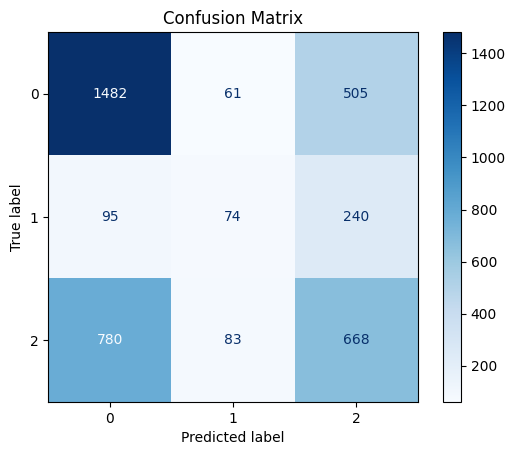

=== Model Evaluation for rf ===
Accuracy: 0.5837512537612839
              precision    recall  f1-score   support

           0       0.60      0.85      0.70      2041
           1       0.47      0.17      0.25       414
           2       0.55      0.34      0.42      1533

    accuracy                           0.58      3988
   macro avg       0.54      0.45      0.46      3988
weighted avg       0.57      0.58      0.55      3988



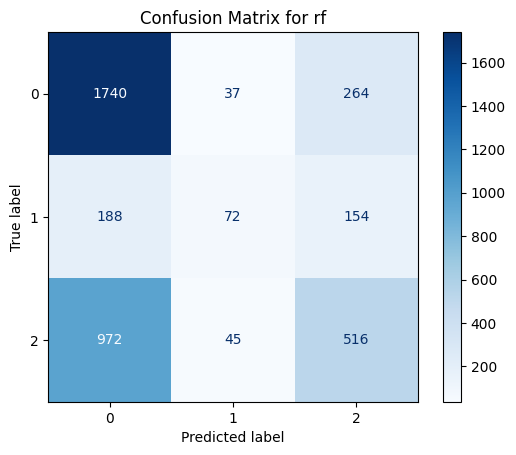

=== Model Evaluation for gb ===
Accuracy: 0.5902708124373119
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      2041
           1       0.47      0.25      0.32       414
           2       0.53      0.39      0.45      1533

    accuracy                           0.59      3988
   macro avg       0.54      0.48      0.49      3988
weighted avg       0.57      0.59      0.57      3988



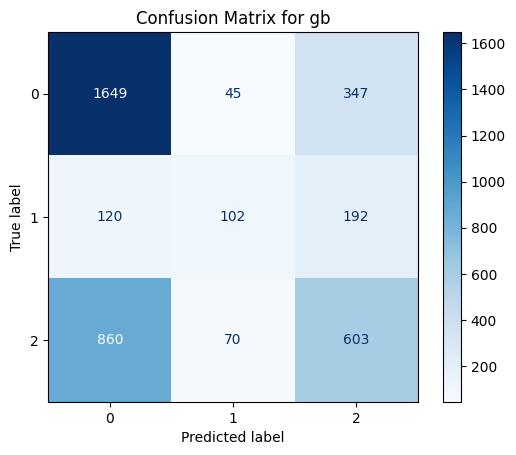

=== Model Evaluation for xgb ===
Accuracy: 0.5907723169508525
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      2041
           1       0.42      0.34      0.38       414
           2       0.54      0.38      0.45      1533

    accuracy                           0.59      3988
   macro avg       0.53      0.51      0.51      3988
weighted avg       0.58      0.59      0.57      3988



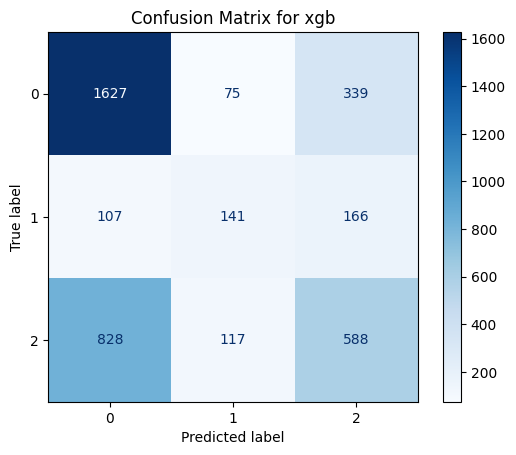

=== Model Evaluation for svc ===
Accuracy: 0.5117853560682046
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2041
           1       0.00      0.00      0.00       414
           2       0.00      0.00      0.00      1533

    accuracy                           0.51      3988
   macro avg       0.17      0.33      0.23      3988
weighted avg       0.26      0.51      0.35      3988



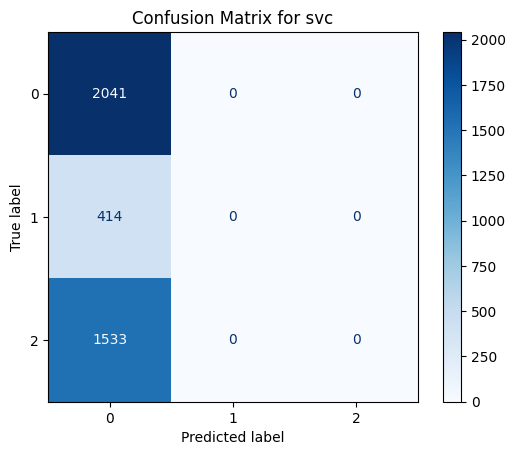

=== Model Evaluation for Stacking Classifier ===
Accuracy: 0.6025576730190572
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      2041
           1       0.43      0.30      0.35       414
           2       0.55      0.44      0.48      1533

    accuracy                           0.60      3988
   macro avg       0.54      0.51      0.52      3988
weighted avg       0.59      0.60      0.59      3988



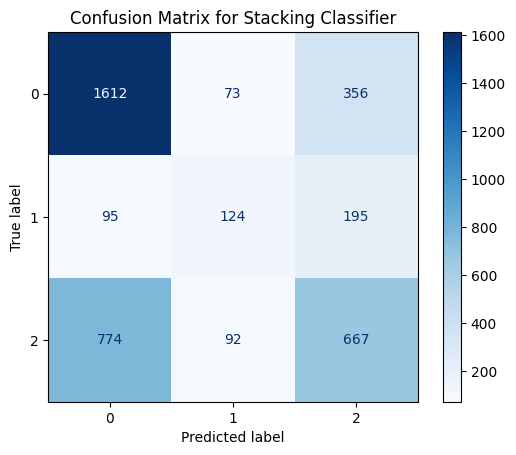


Class distribution after SMOTE:
 Genetic_Disorder
0    8161
2    8161
1    8161
Name: count, dtype: int64
=== Model Evaluation for rf ===
Accuracy: 0.5729689067201604
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      2041
           1       0.45      0.37      0.41       414
           2       0.51      0.39      0.44      1533

    accuracy                           0.57      3988
   macro avg       0.53      0.50      0.51      3988
weighted avg       0.56      0.57      0.56      3988



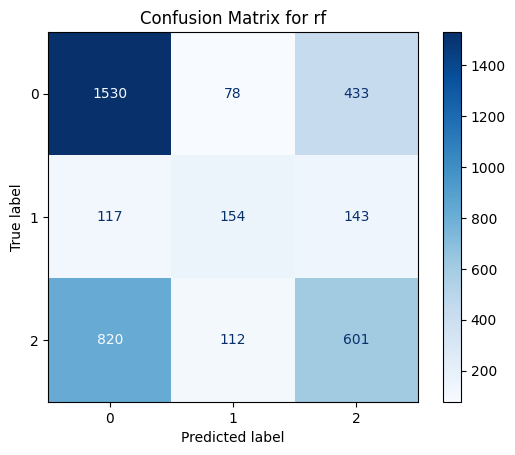

=== Model Evaluation for gb ===
Accuracy: 0.571715145436309
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      2041
           1       0.40      0.51      0.45       414
           2       0.52      0.39      0.45      1533

    accuracy                           0.57      3988
   macro avg       0.52      0.54      0.52      3988
weighted avg       0.57      0.57      0.56      3988



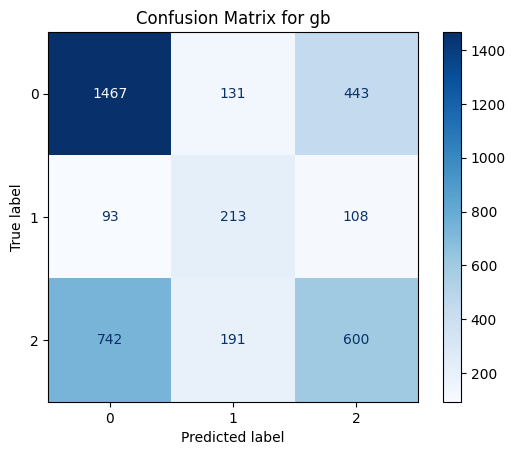

=== Model Evaluation for xgb ===
Accuracy: 0.5599297893681043
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2041
           1       0.38      0.50      0.43       414
           2       0.51      0.38      0.43      1533

    accuracy                           0.56      3988
   macro avg       0.50      0.53      0.51      3988
weighted avg       0.56      0.56      0.55      3988



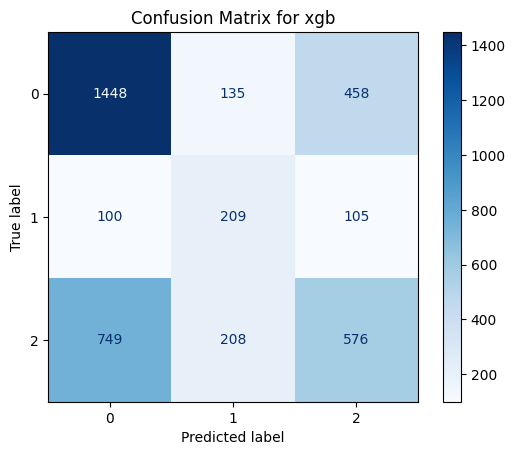

=== Model Evaluation for svc ===
Accuracy: 0.47617853560682044
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      2041
           1       0.38      0.53      0.44       414
           2       0.37      0.23      0.28      1533

    accuracy                           0.48      3988
   macro avg       0.43      0.47      0.44      3988
weighted avg       0.46      0.48      0.46      3988



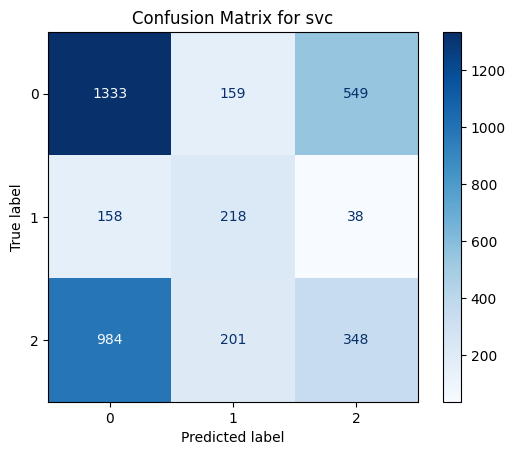

=== Model Evaluation for Stacking Classifier ===
Accuracy: 0.5764794383149449
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      2041
           1       0.43      0.21      0.28       414
           2       0.49      0.48      0.49      1533

    accuracy                           0.58      3988
   macro avg       0.52      0.47      0.48      3988
weighted avg       0.56      0.58      0.56      3988



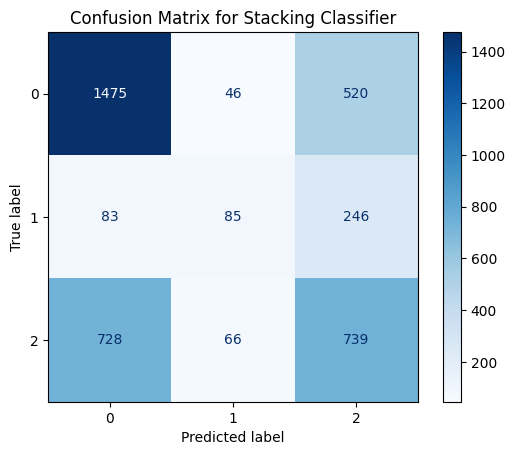


Class distribution after ADASYN:
 Genetic_Disorder
0    8161
1    8016
2    6670
Name: count, dtype: int64
=== Model Evaluation for rf ===
Accuracy: 0.5842527582748245
              precision    recall  f1-score   support

           0       0.61      0.83      0.70      2041
           1       0.41      0.44      0.42       414
           2       0.59      0.30      0.40      1533

    accuracy                           0.58      3988
   macro avg       0.54      0.52      0.51      3988
weighted avg       0.58      0.58      0.56      3988



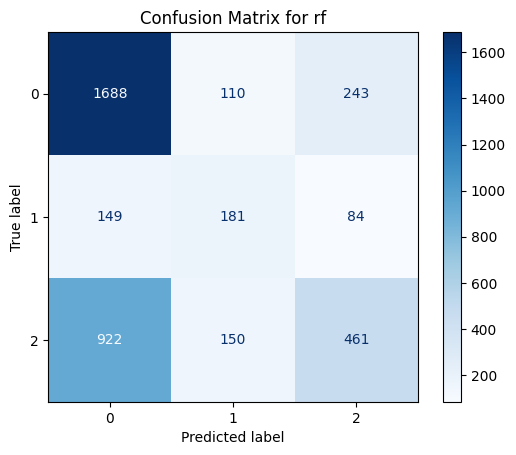

=== Model Evaluation for gb ===
Accuracy: 0.574222668004012
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      2041
           1       0.38      0.55      0.45       414
           2       0.56      0.30      0.39      1533

    accuracy                           0.57      3988
   macro avg       0.52      0.54      0.51      3988
weighted avg       0.57      0.57      0.55      3988



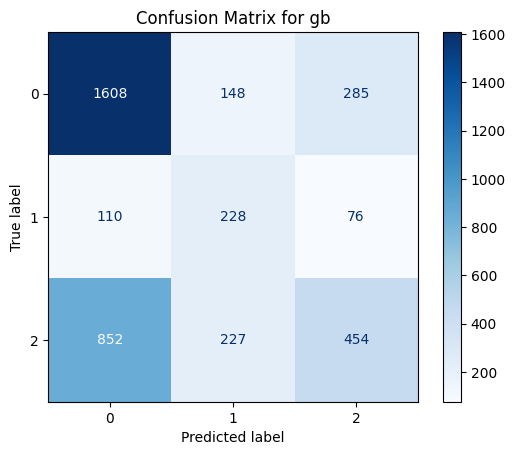

=== Model Evaluation for xgb ===
Accuracy: 0.5777331995987964
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      2041
           1       0.37      0.56      0.44       414
           2       0.57      0.30      0.39      1533

    accuracy                           0.58      3988
   macro avg       0.52      0.55      0.51      3988
weighted avg       0.58      0.58      0.56      3988



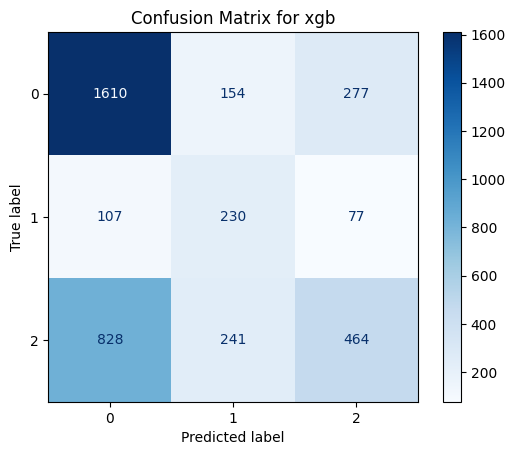

=== Model Evaluation for svc ===
Accuracy: 0.5235707121364093
              precision    recall  f1-score   support

           0       0.55      0.92      0.69      2041
           1       0.37      0.53      0.43       414
           2       0.00      0.00      0.00      1533

    accuracy                           0.52      3988
   macro avg       0.31      0.48      0.37      3988
weighted avg       0.32      0.52      0.40      3988



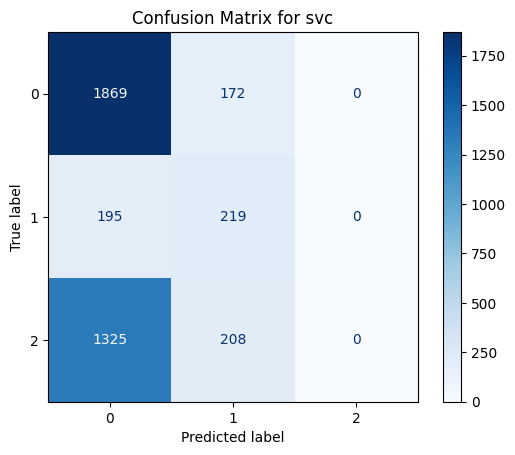

=== Model Evaluation for Stacking Classifier ===
Accuracy: 0.5870110330992979
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      2041
           1       0.41      0.30      0.35       414
           2       0.53      0.41      0.46      1533

    accuracy                           0.59      3988
   macro avg       0.53      0.50      0.50      3988
weighted avg       0.57      0.59      0.57      3988



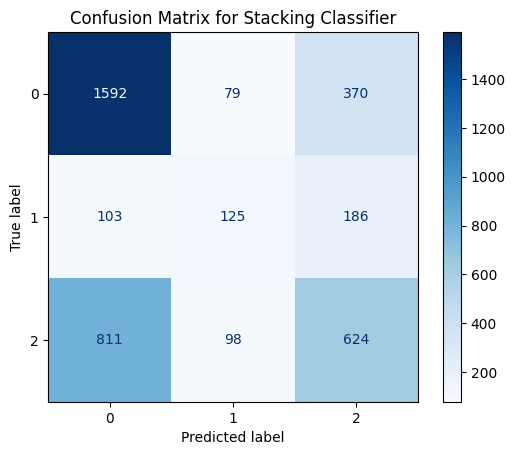

array([0, 2, 0, ..., 0, 2, 0], dtype=int64)

In [131]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# X = train_data.drop(['Genetic_Disorder','Disorder_Subclass'], axis=1)
# y = train_data['Genetic_Disorder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define base classifiers with hyperparameter tuning
base_classifiers = {
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'svc': SVC(probability=True, random_state=42)
}

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(base_classifiers['rf'], rf_param_grid, cv=5, scoring='accuracy')
base_classifiers['rf'] = rf_grid.fit(X_train, y_train).best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(base_classifiers['gb'], gb_param_grid, cv=5, scoring='accuracy')
base_classifiers['gb'] = gb_grid.fit(X_train, y_train).best_estimator_

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid = GridSearchCV(base_classifiers['xgb'], xgb_param_grid, cv=5, scoring='accuracy')
base_classifiers['xgb'] = xgb_grid.fit(X_train, y_train).best_estimator_

# Define the meta-classifier
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Function to evaluate classifiers
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"=== Model Evaluation for {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    return y_pred

# Evaluate base classifiers before SMOTE
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name)

# Create and evaluate the stacking classifier before SMOTE
stacking_classifier = StackingClassifier(
    estimators=list(base_classifiers.items()),
    final_estimator=meta_classifier,
    cv=5,
    n_jobs=-1
)

# Evaluate stacking classifier before SMOTE
evaluate_classifier(stacking_classifier, X_train, y_train, X_test, y_test, "Stacking Classifier")

# Apply SMOTE for balancing the training data
smote = SMOTE(random_state=42 )
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

# Evaluate base classifiers after SMOTE
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_res, y_train_res, X_test, y_test, name)

# Evaluate stacking classifier after SMOTE
evaluate_classifier(stacking_classifier, X_train_res, y_train_res, X_test, y_test, "Stacking Classifier")

# Apply ADASYN for balancing the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Verify the new class distribution after ADASYN
print("\nClass distribution after ADASYN:\n", pd.Series(y_train_adasyn).value_counts())

# Evaluate base classifiers after ADASYN
for name, classifier in base_classifiers.items():
    evaluate_classifier(classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, name)

# Evaluate stacking classifier after ADASYN
evaluate_classifier(stacking_classifier, X_train_adasyn, y_train_adasyn, X_test, y_test, "Stacking Classifier")